# Free Music Archive

[The Free Music Archive](https://github.com/mdeff/fma) contains metadata and 30 second clips of over 100,000 tracks.

In [1]:
import sqlite3
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# # Import FMA specific utilities
# import importlib.util
# spec = importlib.util.spec_from_file_location("utils", "/Users/ryanswan/code/fma/utils.py")
# fma = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(fma)

## EDA

### Tracks

The tracks table is the unifying feature set for the FMA. It provides details about track length, artist location, and various other relevant information.

In [3]:
# test = fma.load('~/Downloads/fma_metadata/tracks.csv') Throws error for some reason - need to investigate

In [4]:
# Tracks table
tracks = pd.read_csv('../data/raw/fma_metadata/tracks.csv', index_col=0, header=[0,1])

In [5]:
print(tracks.shape)

(106574, 52)


In [6]:
print(tracks.columns)

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [7]:
print(tracks.head())

            album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                      

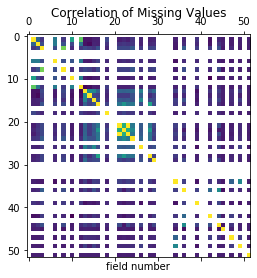

In [8]:
na_grid = tracks.applymap(pd.isna)
plt.matshow(na_grid.corr())
plt.xlabel('field number')
plt.title('Correlation of Missing Values')
plt.show()

In [9]:
row_na = na_grid.apply(sum, axis=1)

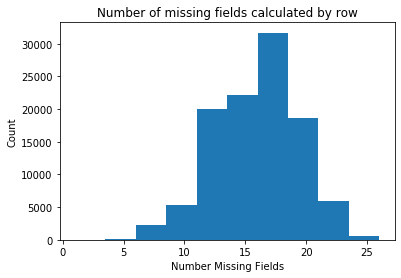

In [10]:
plt.hist(row_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by row')
plt.show()

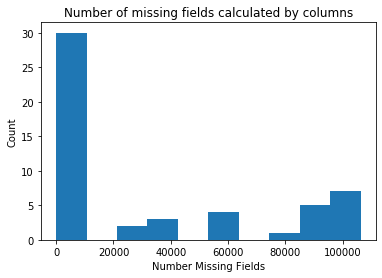

In [11]:
col_na = na_grid.apply(sum, axis=0)
plt.hist(col_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by columns')
plt.show()

In [12]:
# Define class to produce these plots reliably
class NaAnalysis:
    def __init__(self, df):
        self.na_grid = df.applymap(pd.isna)
        self.row_na = self.na_grid.apply(sum, axis=1)
        self.col_na = self.na_grid.apply(sum, axis=0)
    def corr_plot(self):
        # Correlation plot
        plt.matshow(self.na_grid.corr())
        plt.xlabel('field number')
        plt.title('Correlation of Missing Values')
        plt.show()
    def row_plot(self):
        # Row Histogram
        plt.hist(self.row_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by row')
        plt.show()
    def col_plot(self):
        # Col Histogram
        plt.hist(self.col_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by columns')
        plt.show()
    def run_analysis(self):
        self.corr_plot()
        self.row_plot()
        self.col_plot()

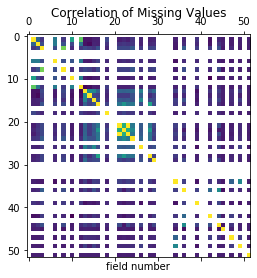

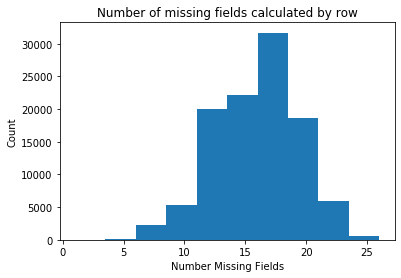

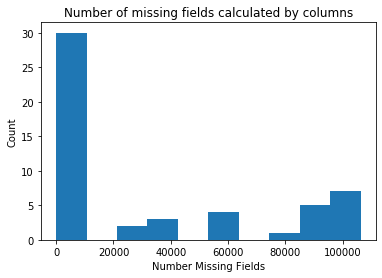

In [13]:
tracks_na = NaAnalysis(tracks)
tracks_na.run_analysis()

In [14]:
# Get percentage of null values in each field
n_null = tracks.isnull().sum() / len(tracks)
high_miss = n_null[n_null > 0.20]
print(high_miss)

album   date_released        0.340421
        engineer             0.856485
        information          0.219800
        producer             0.830540
artist  active_year_begin    0.786899
        active_year_end      0.949566
        associated_labels    0.866093
        bio                  0.332332
        latitude             0.582037
        location             0.341209
        longitude            0.582037
        members              0.560409
        related_projects     0.876593
        website              0.256329
        wikipedia_page       0.947633
track   composer             0.965564
        date_recorded        0.942209
        genre_top            0.534614
        information          0.977959
        language_code        0.859028
        lyricist             0.997082
        publisher            0.988149
dtype: float64


In [15]:
high_miss_indexed = tracks[high_miss.index]
high_miss_indexed

album           \
                date_released engineer   
track_id                                 
2         2009-01-05 00:00:00      NaN   
3         2009-01-05 00:00:00      NaN   
5         2009-01-05 00:00:00      NaN   
10        2008-02-06 00:00:00      NaN   
20        2009-01-06 00:00:00      NaN   
...                       ...      ...   
155316    2017-02-17 00:00:00      NaN   
155317    2017-02-17 00:00:00      NaN   
155318    2017-02-17 00:00:00      NaN   
155319    2017-02-17 00:00:00      NaN   
155320    2017-03-26 00:00:00      NaN   

                                                                          \
                                                information     producer   
track_id                                                                   
2                                                   <p></p>          NaN   
3                                                   <p></p>          NaN   
5                                                   <p></p>          NaN   
10                                                      NaN          NaN   
20                <p> "spiritual songs" from Nicky Cook</p>          NaN   
...                                                     ...          ...   
155316    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155317    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155318    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155319    <p>A live performance at Monty Hall on Feb 17,...  Monty Hall    
155320                                                  NaN          NaN   

                       artist                       \
            active_year_begin      active_year_end   
track_id                                             
2         2006-01-01 00:00:00                  NaN   
3         2006-01-01 00:00:00                  NaN   
5         2006-01-01 00:00:00                  NaN   
10                        NaN                  NaN   
20        1990-01-01 00:00:00  2011-01-01 00:00:00   
...                       ...                  ...   
155316                    NaN                  NaN   
155317                    NaN                  NaN   
155318                    NaN                  NaN   
155319                    NaN                  NaN   
155320                    NaN                  NaN   

                                                             \
                                          associated_labels   
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   
...                                                     ...   
155316                                                  NaN   
155317                                                  NaN   
155318                                                  NaN   
155319                                                  NaN   
155320                                                  NaN   

                                                                        \
                                                        bio   latitude   
track_id                                                                 
2         <p>A Way Of Life, A Collective of Hip-Hop from...  40.058324   
3         <p>A Way Of Life, A Collective of Hip-Hop from...  40.058324   
5         <p>A Way Of Life, A Collective of Hip-Hop from...  40.058324   
10        <p><span style="font-family:Verdana, Geneva, A...        NaN   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...  51.895927   
...                                                     ...        ...   
155316                                                  NaN     

In [16]:
# Correlation of each feature with target value
dummy_genre = pd.get_dummies(tracks.track.genre_top)
dummy_tracks = pd.concat([dummy_genre, tracks], axis=1)
dummy_corr = dummy_tracks.corr()
print(dummy_corr)

                        Blues  Classical   Country  Easy Listening  \
Blues                1.000000  -0.003473 -0.001373       -0.000482   
Classical           -0.003473   1.000000 -0.004614       -0.001622   
Country             -0.001373  -0.004614  1.000000       -0.000641   
Easy Listening      -0.000482  -0.001622 -0.000641        1.000000   
Electronic          -0.009981  -0.033553 -0.013260       -0.004660   
Experimental        -0.010687  -0.035926 -0.014198       -0.004990   
Folk                -0.005283  -0.017759 -0.007019       -0.002467   
Hip-Hop             -0.005969  -0.020064 -0.007929       -0.002787   
Instrumental        -0.004534  -0.015241 -0.006024       -0.002117   
International       -0.003694  -0.012417 -0.004907       -0.001725   
Jazz                -0.002359  -0.007931 -0.003134       -0.001102   
Old-Time / Historic -0.002324  -0.007811 -0.003087       -0.001085   
Pop                 -0.004808  -0.016162 -0.006387       -0.002245   
Rock                

In [17]:
dummy_corr[dummy_corr == 1] = np.nan

In [18]:
np.max(dummy_corr)

Blues                  0.032736
Classical              0.095927
Country                0.011530
Easy Listening         0.009479
Electronic             0.072787
Experimental           0.147102
Folk                   0.012757
Hip-Hop                0.043304
Instrumental           0.072663
International          0.010410
Jazz                   0.025001
Old-Time / Historic    0.015196
Pop                    0.164082
Rock                  -0.005880
Soul-RnB               0.022353
Spoken                 0.064676
(album, comments)      0.817900
(album, favorites)     0.471746
(album, id)            0.768438
(album, listens)       0.817900
(album, tracks)        0.554440
(artist, comments)     0.897151
(artist, favorites)    0.897151
(artist, id)           0.768438
(artist, latitude)     0.072798
(artist, longitude)    0.219426
(track, bit_rate)      0.276548
(track, comments)      0.480024
(track, duration)      0.092303
(track, favorites)     0.810129
(track, interest)      0.833730
(track, 

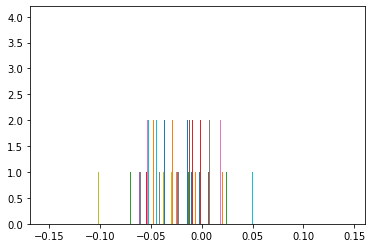

In [19]:
plt.hist(dummy_corr[['Rock','Experimental','Classical','Hip-Hop']], bins=20)
plt.show()

### Genres

In [20]:
# Genres Table
genres = pd.read_csv('../data/raw/fma_metadata/genres.csv',header=0)

(163, 5)


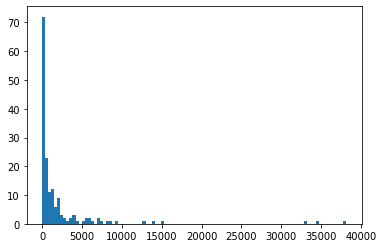

In [21]:
print(genres.shape)
plt.hist(genres['#tracks'], bins=100)
plt.show()

In [22]:
print(genres.columns)

Index(['genre_id', '#tracks', 'parent', 'title', 'top_level'], dtype='object')


In [23]:
print(genres.head(100))

    genre_id  #tracks  parent                   title  top_level
0          1     8693      38             Avant-Garde         38
1          2     5271       0           International          2
2          3     1752       0                   Blues          3
3          4     4126       0                    Jazz          4
4          5     4106       0               Classical          5
..       ...      ...     ...                     ...        ...
95       186      682      38            Sound Poetry         38
96       187      292       5  20th Century Classical          5
97       188      301      20                  Poetry         20
98       189       26      65              Talk Radio         20
99       214       40      92           North African          2

[100 rows x 5 columns]


/usr/local/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


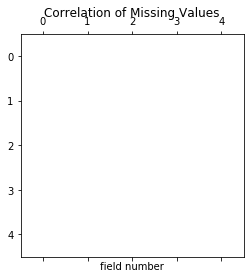

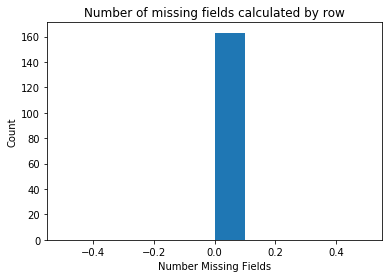

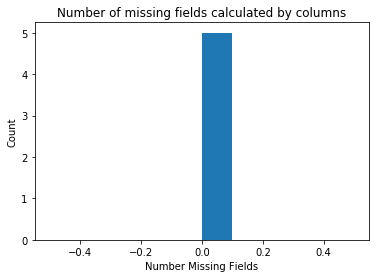

In [24]:
genres_na = NaAnalysis(genres)
genres_na.run_analysis()

The genre table is complete, and no missing values exist.

In [25]:
# We can join the genre table back to the tracks table 
# to assess how many of each genre/subgenre are present
print(tracks.columns)
tracks['id.1'].head()

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

KeyError: 'id.1'

### Features

In [ ]:
# Features Table
features = pd.read_csv('../data/raw/fma_metadata/features.csv',index_col=0,header=[0,1,2])

In [ ]:
print(features.shape)

In [ ]:
for f in features.columns:
  print(f)

In [ ]:
print(features.head())

In [ ]:
features_na = NaAnalysis(features)
features_na.run_analysis()

In [ ]:
print(features_na.col_na.sort_values())

### Echonest

In [ ]:
# Echonest Table
echonest = pd.read_csv('../data/raw/fma_metadata/echonest.csv', index_col=0, header=[0,1,2])

In [ ]:
print(echonest.shape)

In [ ]:
for f in echonest.columns:
    print(f)

In [ ]:
print(echonest.head())

In [ ]:
echonest.describe()

In [ ]:
echonest_na = NaAnalysis(echonest)
echonest_na.run_analysis()
print(echonest_na.col_na.sort_values())

## Analyses

### Location Data

In [ ]:
print(np.isnan(tracks.artist.latitude).sum(), 
      np.isnan(tracks.artist.longitude).sum(),
      len(tracks))

In [ ]:
import geopandas as gp
from shapely.geometry import Point, Polygon

In [ ]:
geometry = [Point(xy) for xy in zip(tracks.artist.longitude,tracks.artist.latitude)]
crs = {'init' :'epsg:4326'}
geo_df = gp.GeoDataFrame(tracks, crs=crs, geometry=geometry)
geo_df.head()

In [ ]:
import geopandas as gp 

fig,ax = plt.subplots(figsize = (15,15))
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot(ax = ax, alpha = 0.5, color='grey')
# geo_df.plot(ax=ax, markersize = 2, color = 'blue', marker='o')
geo_df.plot(ax=ax, markersize = 2, color = 'blue', marker='o')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x=tracks.artist.longitude, 
                y=tracks.artist.latitude, 
                hue=tracks.track.genre_top, 
                size=0.5,
                alpha=0.5)
plt.show()

In [ ]:
# Assign tracks regional coordinates

tracks['region'] = ''
north_america = (tracks.artist.longitude < -25) & (tracks.artist.latitude > 10)
south_america = (tracks.artist.longitude < -25) & (tracks.artist.latitude < 10)
europe = (tracks.artist.longitude > -25) & (tracks.artist.latitude > 25) & (tracks.artist.longitude < 50)
africa = (tracks.artist.longitude > -10) & (tracks.artist.latitude < 25) & (tracks.artist.longitude < 50)
asia = (tracks.artist.latitude > -15) & (tracks.artist.longitude > 50)
australia = (tracks.artist.latitude < -15) & (tracks.artist.longitude > 100)

tracks.loc[north_america,'region'] = 'NA'
tracks.loc[south_america,'region'] = 'SA'
tracks.loc[europe,'region'] = 'EUR'
tracks.loc[africa,'region'] = 'AFR'
tracks.loc[asia,'region'] = 'ASI'
tracks.loc[australia,'region'] = 'AUS'

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x=tracks.artist.longitude, 
                y=tracks.artist.latitude, 
                hue=tracks.region, 
                size=0.5,
                alpha=0.5)
plt.show()

In [ ]:
tracks.region.value_counts()

### Genre nesting analysis

In [ ]:
genres.head()

In [ ]:
tracks.track.genre_top.value_counts()

In [ ]:
tracks.track.genre_top.isna().sum()

In [ ]:
tracks[pd.isna(tracks.track.genre_top)].track.genres

Many of the tracks with missing genre information still seem to have genre info. However they are tagged with multiple top-level tags.

In [ ]:
track_genres = tracks[pd.isna(tracks.track.genre_top)].track.genres

In [ ]:
# isolate top three most common genres
genre_filter = tracks.track.genre_top.isin(['Rock','Experimental','Electronic'])
genre_tracks = tracks.loc[genre_filter,:]

In [ ]:
genre_tracks.shape

#### Considering reduced genres correlation with expanded features

In [ ]:
tracks_new = tracks.copy()
tracks_new.columns = ['_'.join(col).strip() for col in tracks_new.columns.values]
features_new = features.copy()
features_new.columns = ['_'.join(col).strip() for col in features_new.columns.values]

In [ ]:
tracks_merged = pd.merge(tracks_new, features_new, left_index=True, right_index=True)

In [ ]:
tracks_merged.shape

In [ ]:
# Correlation of each feature with target value
dummy_genre = pd.get_dummies(tracks_merged.track_genre_top)
dummy_tracks = pd.concat([dummy_genre, tracks_merged], axis=1)
dummy_corr = dummy_tracks.corr()

In [ ]:
dummy_corr[dummy_corr == 1] = np.nan
np.max(dummy_corr)[0:16]

In [ ]:
tracks_merged

In [ ]:
import geopandas as gp
import matplotlib.pyplot as plt
us_states = gp.read_file('/Users/ryanswan/Downloads/states_21basic')


We can plot the data for the whole world against our US map

In [ ]:
ax = us_states.geometry.boundary.plot(color='gray', figsize=(10,10))
geo_df.plot(figsize=(10,10), ax=ax)
plt.show

Finding data just within the united states...

In [ ]:
united_states = us_states.geometry.unary_union
in_us_boundary = geo_df.geometry.within(united_states)
inside_us = geo_df[in_us_boundary]

Roughly 20% of all tracks are in the US

In [ ]:
inside_us.shape

In [ ]:
ax = us_states.geometry.boundary.plot(color='gray', figsize=(10,10))
inside_us.plot(figsize=(10,10), ax=ax)
plt.show()

In [ ]:
# For simplicity of plotting we skip Hawaii and Alaska
continental_us = us_states[~us_states.STATE_NAME.isin(['Alaska','Hawaii'])]
in_cont_us = inside_us[inside_us.geometry.within(continental_us.geometry.unary_union)]

In [ ]:
ax = continental_us.geometry.boundary.plot(color='gray', figsize=(10,10))
in_cont_us.plot(figsize=(10,10), ax=ax)
plt.show()

In [ ]:
# # Binning points by region in shapefile
# # From: https://stackoverflow.com/questions/7861196/check-if-a-geopoint-with-latitude-and-longitude-is-within-a-shapefile

# from gdal import ogr
# from IPython import embed
# import sys

# drv = ogr.GetDriverByName('ESRI Shapefile')
# ds_in = drv.Open('/Users/ryanswan/Downloads/states_21basic/states.shp')
# lyr_in = ds_in.GetLayer(0)
# print(lyr_in.GetFeatureCount())

# for i in range(1,lyr_in.GetFeatureCount()):
#     field = lyr_in.GetFeature(i)
#     print(field)

print(in_cont_us)


In [ ]:
from shapely.geometry import Point

artists = list(zip(in_cont_us.artist.longitude, in_cont_us.artist.latitude))

print(continental_us.columns)

output = []
for artist in artists:
    coord = Point(artist)
    which_state = continental_us.geometry.contains(coord)
    output.append(continental_us[which_state].STATE_NAME.values[0])

In [ ]:
from collections import Counter
state_count = Counter(output)

In [ ]:
state_vals = pd.DataFrame.from_dict(state_count, orient='index').reset_index()
state_vals = state_vals.rename(columns={'index':'state', 0:'n_artists'})
# state_vals
us_chloropleth = continental_us.merge(state_vals, left_on='STATE_NAME', right_on='state')

In [ ]:
us_chloropleth.plot(column='n_artists', figsize=(40,40), legend=True)
plt.show()

Let's wrap some of these analyses in functions...

In [ ]:
def filter_pts_by_boundary(geo_df, shapefile):
    '''Return only points inside the specified shapefile boundary'''
    boundary = shapefile.geometry.unary_union
    in_boundary = geo_df.geometry.within(boundary)
    return geo_df[in_boundary]

def assign_pt_to_region(long, lat, shapefile, field):
    '''Check for membership in shapefile polygons and return a count of points'''
    output = []
    coord = list(zip(long, lat))
    for c in coord:
        c = Point(c)
        which_shape = shapefile.geometry.contains(c)
        output.append(shapefile[which_shape][field].values[0])
    return output

def add_chloro_column(region_list, shapefile, field):
    '''Add count of values to shapefile regions'''
    val_count = Counter(region_list)
    merge_col = pd.DataFrame.from_dict(val_count, orient='index').reset_index()
    merge_col = merge_col.rename(columns={'index':'merge_field', 0:'vals'})
    new_geo_df = shapefile.merge(merge_col, left_on=field, right_on='merge_field')
    return new_geo_df


In [ ]:
# test = filter_pts_by_boundary(geo_df=geo_df, shapefile=continental_us)
# test2 = assign_pt_to_region(test.artist.longitude, test.artist.latitude, continental_us, 'STATE_NAME')
test3 = add_chloro_column(test2, continental_us, 'STATE_NAME')
test3.plot(column='vals', figsize=(40,40), legend=True)

In [ ]:
europe = gp.read_file('/Users/ryanswan/Downloads/europe')
europe.geometry.boundary.plot(color='gray', figsize=(40,40))

We can use our functions described above to make our chloropleth map...

In [ ]:
euro_pts = filter_pts_by_boundary(geo_df, europe)
euro_pt_membership = assign_pt_to_region(euro_pts.artist.longitude, 
                                         euro_pts.artist.latitude, 
                                         europe,
                                         'CNTRY_NAME')
euro_chlor = add_chloro_column(euro_pt_membership, europe, 'CNTRY_NAME')

In [ ]:
euro_chlor.plot(column='vals', legend=True, figsize=(40,40))

### Crosstab Comparisons

In [ ]:
pd.crosstab(genre_tracks.region, genre_tracks.track.genre_top)

We can see that America has much more rock while Europe has much more electronic music.

In [ ]:
pd.crosstab(genre_tracks.region, genre_tracks.track.genre_top, normalize='index')

In [ ]:
tracks.columns